In [3]:
import os
from datetime import datetime, timedelta

import paho.mqtt.client as mqtt
import pandas as pd
# import fastparquet
import pyarrow.parquet as pq
import pyarrow
import time 
import json
import fnmatch
import glob

In [5]:
fn_list = glob.glob('AudioDataArchive/08-03-23/*.parquet')
print(len(fn_list))

87


In [6]:
fn_snippet_list = fn_list[0:10]
fn_snippet_list

['AudioDataArchive/08-03-23\\data_2023-07-11_0.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-12_0.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-12_1.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-12_2.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-12_3.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-13_0.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-13_1.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-13_2.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-13_3.parquet',
 'AudioDataArchive/08-03-23\\data_2023-07-14_0.parquet']

In [7]:
df = pd.DataFrame()
for file in fn_snippet_list:
    tdf = pd.read_parquet(file)
    if df.empty:
        df = tdf
    else:
        df = pd.concat([df, tdf])
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89996 entries, 0 to 89995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  89996 non-null  float64
 1   value      89996 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [8]:
df.at[200, 'value']

'{"ZM6_MillRPM":501.77996826171875,"ZM6_MillFPM":271.4196472167969,"ZM6_RightTension":210.52732849121094,"ZM6_LeftTension":205.18917846679688,"WMAX0":0.118627,"RMS0":0.02838,"GNDOFF0":1.652219,"ZCS0":35746,"WMAX1":0.032439,"ZCS1":27781,"RMS1":0.004114,"GNDOFF1":1.654622}'

In [9]:
df2 = pd.concat([df.loc[:,['timestamp']],df.loc[:].value.apply(json.loads).apply(pd.Series)], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89996 entries, 0 to 89995
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         89996 non-null  float64
 1   ZM6_MillRPM       89996 non-null  float64
 2   ZM6_MillFPM       89996 non-null  float64
 3   ZM6_RightTension  89996 non-null  float64
 4   ZM6_LeftTension   89996 non-null  float64
 5   WMAX0             89996 non-null  float64
 6   RMS0              89996 non-null  float64
 7   GNDOFF0           89996 non-null  float64
 8   ZCS0              89996 non-null  float64
 9   WMAX1             89996 non-null  float64
 10  ZCS1              89996 non-null  float64
 11  RMS1              89996 non-null  float64
 12  GNDOFF1           89996 non-null  float64
dtypes: float64(13)
memory usage: 8.9 MB


In [15]:
import seaborn as sns

In [16]:
df2.columns

Index(['timestamp', 'ZM6_MillRPM', 'ZM6_MillFPM', 'ZM6_RightTension',
       'ZM6_LeftTension', 'WMAX0', 'RMS0', 'GNDOFF0', 'ZCS0', 'WMAX1', 'ZCS1',
       'RMS1', 'GNDOFF1'],
      dtype='object')

C:\Users\fj4908.NASDOMAIN\Documents\GitHub\audio-modeling\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



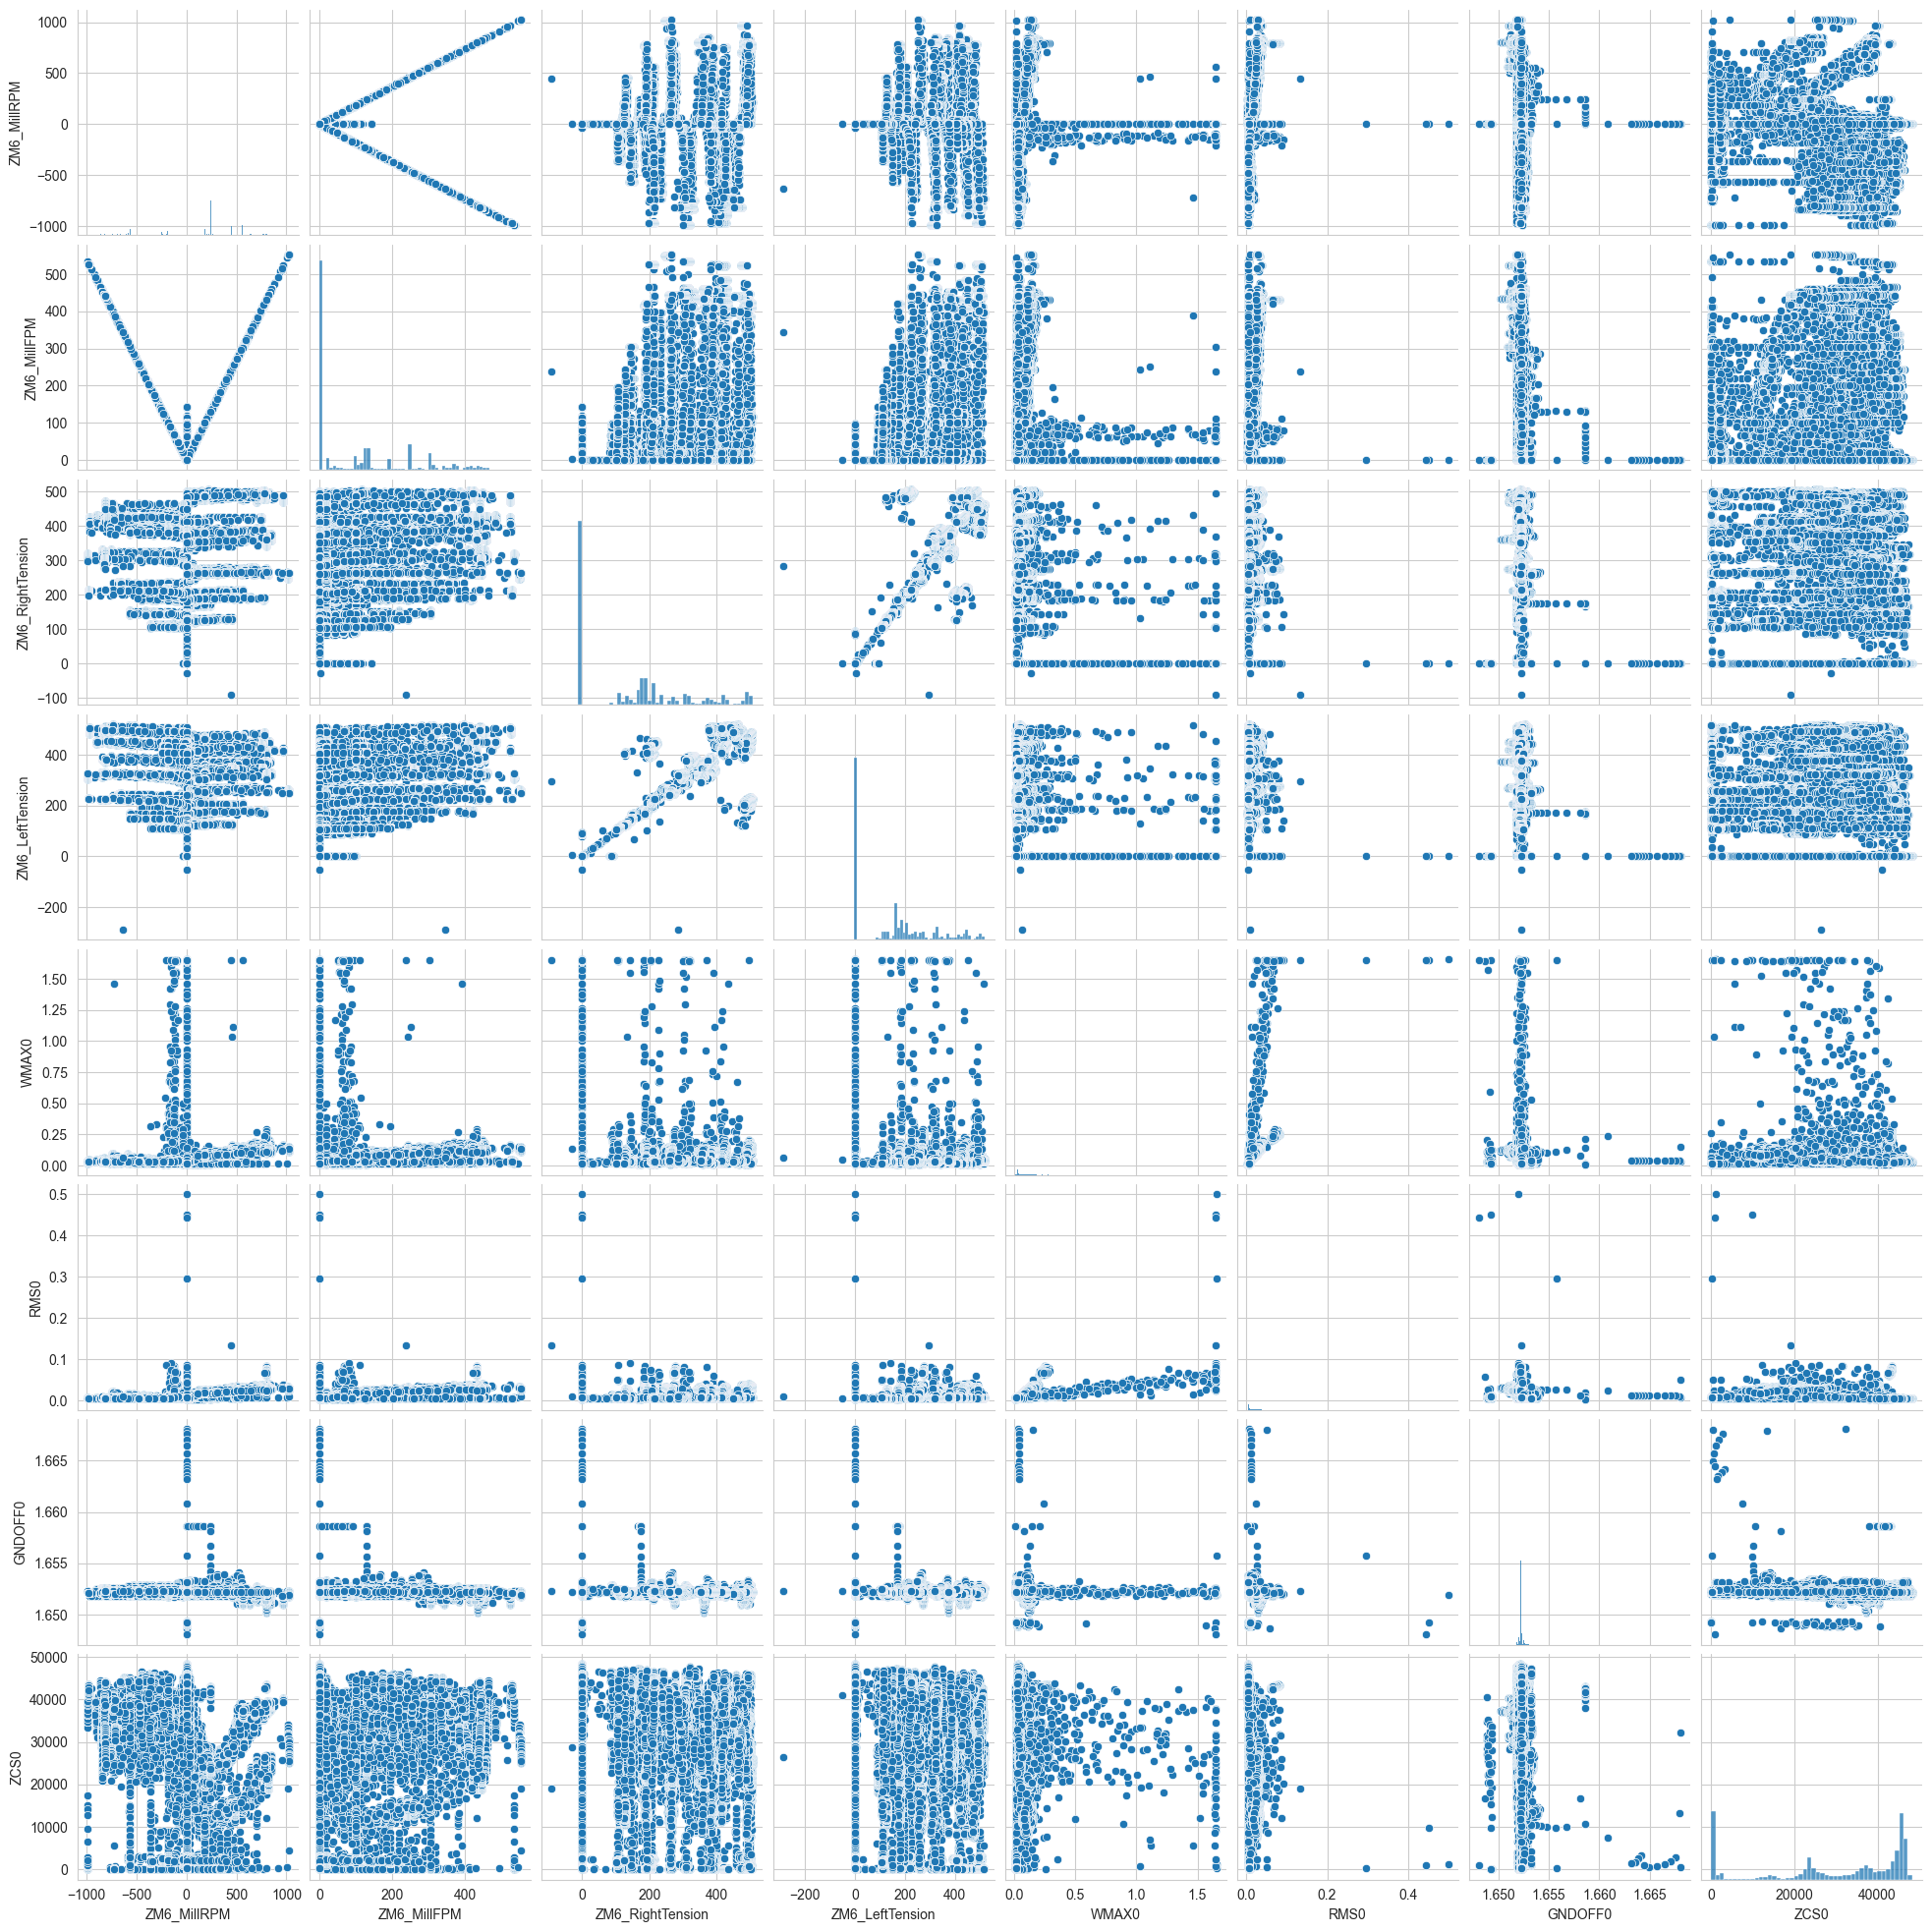

In [17]:
sns.pairplot(df2[['ZM6_MillRPM', 'ZM6_MillFPM', 'ZM6_RightTension',
       'ZM6_LeftTension', 'WMAX0', 'RMS0', 'GNDOFF0', 'ZCS0']])

C:\Users\fj4908.NASDOMAIN\Documents\GitHub\audio-modeling\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



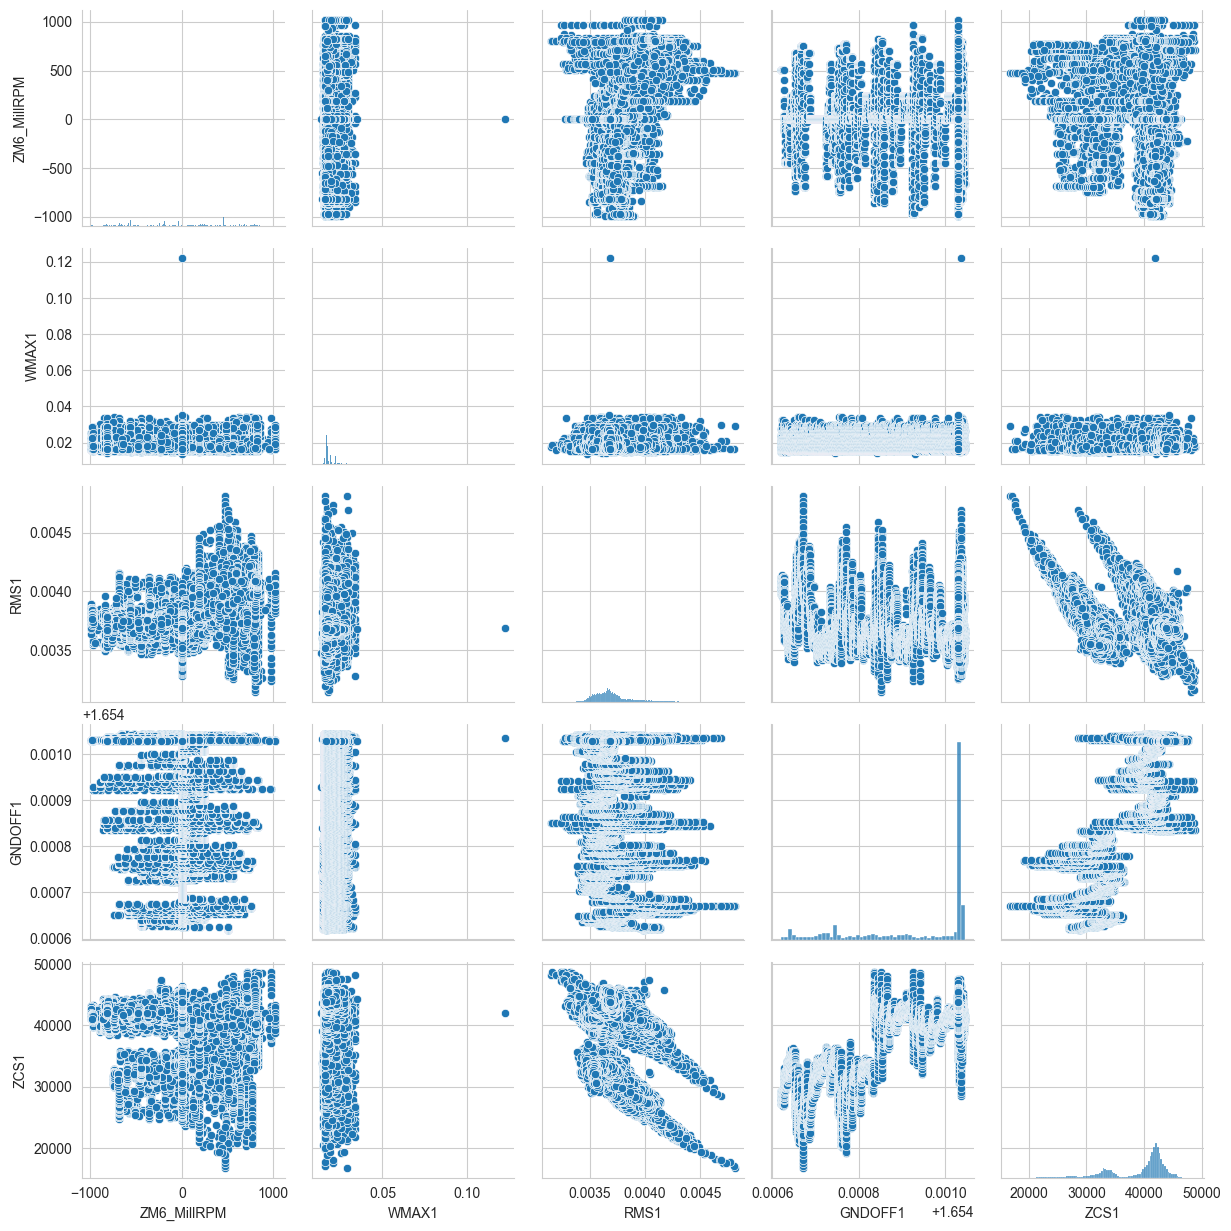

In [18]:
sns.pairplot(df2[[# 'ZM6_MillRPM', 'ZM6_MillFPM', 'ZM6_RightTension','ZM6_LeftTension', 
                  'ZM6_MillRPM', 'WMAX1', 'RMS1', 'GNDOFF1', 'ZCS1']])

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
from sklearn.cluster import DBSCAN as DBS

<Axes: >

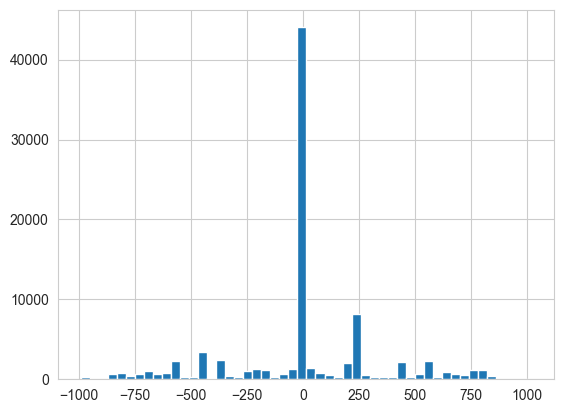

In [21]:
df2.ZM6_MillRPM.hist(bins=50)

In [17]:
run_df = df2.loc[df2.ZM6_MillRPM!=0].copy(deep=True)
X = run_df[['ZM6_MillRPM', 'WMAX1', 'RMS1', 'GNDOFF1', 'ZCS1']].to_numpy()
dbs = DBS().fit(X) # (# eps=.5, min_samples=3).fit(X)
run_df['ch1_dbs_clusters'] = dbs.fit_predict(X)
run_df.ch1_dbs_clusters.count_un()

AttributeError: 'Series' object has no attribute 'count_un'